BeautifulSoup
=====
BeautifulSoup 설치
-----
BeautifulSoup은 html에서 원하는 정보를 빠르게 찾을 수 있습니다.<br>
요즘 Selenium이 강력하기는 하지만, BeautifulSoup으로도 웬만한 정보를 크롤링할 수 있고,<br>
무엇보다도 Selenium보다 훨씬 빠릅니다.(막힐일도 거의 없습니다 ..! 계속 막히면 진짜 죽고싶어요ㅠ)<br>
다음 시간에 배울 Selenium과 함께 사용하면 훨씬 강력한 효과를 볼 수 있습니다.<br>
<br>
설치 방법은 단순합니다. cmd창에서 `pip install beatuifulsoup4`를 실행하시면 됩니다.<br>
아니면 `! pip install beautifulsoup4`를 해도 될 겁니다.<br>
<https://shaeod.tistory.com/900>을 참고해보세요.<br>
<br>
설치가 성공적으로 되었으면 이제 실행해봅시다.

In [1]:
from bs4 import BeautifulSoup

requests 설치
-----
위의 실행이 됐다면 성공한 것입니다. <br>
다음은 url을 주면 html을 가지고 오는 모듈을 설치해 봅시다.<br>
대표적으로 두 개의 모듈이 있는데 하나는 urllib이고 다른 하나는 requests입니다.<br>
과거에는 urllib을 많이 사용했으나 현재는 requrests가 훨씬 가벼워 이것을 더 많이 사용하는 추세입니다.<br>
urllib은 특별히 설치하지 않아도 파이썬에 내장되어 있습니다.<br>
requests를 사용할 경우 마찬가지로 cmd창에 `pip install requests`를 실행하거나,<br>
`! pip install requests`를 실행하면 될 겁니다.

In [2]:
!pip install requests

In [2]:
import requests

## 네이버 html 가지고 오기

In [27]:
# 정보를 가지고 올 url 열기 (네이버)
# headers는 크롤링이 막히는 경우를 방지하기 위한 1가지 방법입니다.
# 쉽게 말하면 자동 프로그램을 사람처럼 위장하기 위한 user-id라고 생각하시면 됩니다!

url = 'https://www.naver.com/'

headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5) AppleWebKit 537.36 (KHTML, like Gecko) Chrome",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8"
}

In [28]:
# html 불러오기

# 1. requests를 통해 정해준 url에 정보를 요청, 그 정보를 response 변수에 저장 
response = requests.get(url, headers=headers)

# 2. url의 정보가 들어있는 response의 텍스트 정보를 source 변수에 저장
source = response.text

# 3. BeautifulSoup을 통해 'lxml'파서를 사용하여 soup에 html 정보를 저장 (파이썬에서 사용할 수 있는 의미있는 객체구조로 변환)
soup = BeautifulSoup(source, 'lxml')

## BeautifulSoup Parser의 종류

<img src="img/parser.PNG" style="width: 1000px;"/>

<bound method Tag.prettify of <!DOCTYPE html>
<html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유
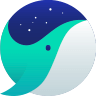
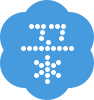

In [5]:
# html 코드 예쁘게 출력하기
soup.prettify

In [6]:
# 타이틀 확인
soup.title

<title>NAVER</title>

In [7]:
# 태그 제외하고 텍스트만 보기
soup.title.text

'NAVER'

### html 태그
html 태그 구조는 다음과 같습니다.
- <태그 명(a, span, title, li...) 속성(class, content, href...)="속성 설명"> 텍스트 </태그>

In [9]:
# 태그로 정보 찾기 (find)
soup.find("meta")

<meta charset="utf-8"/>

In [13]:
# 태그로 모든 정보 찾기 (find_all)
soup.find_all("meta")

<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/>

In [19]:
# 태그와 속성 찾기
# 리스트 형태로 반환
soup.find_all("a", attrs = {"class":"nav"})

<a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a>

In [26]:
# 태그로 텍스트 확인
soup.find_all("a", attrs = {"class":"nav"})[4].text

'쇼핑'

## 네이버랩 실시간 검색어 가지고 오기

In [17]:
# 정보를 가지고 올 url 열기 (네이버랩)
# 네이버 실시간 검색어에 필터가 생기면서 네이버 홈페이지에선 크롤링을 할 수가 없게 되었습니다.

url = 'https://datalab.naver.com/keyword/realtimeList.naver?age=all&where=main'

headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5) AppleWebKit 537.36 (KHTML, like Gecko) Chrome",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8"
}

In [18]:
# html 불러오기

response = requests.get(url, headers=headers)
source = response.text
soup = BeautifulSoup(source, 'lxml')

In [19]:
# html 코드 예쁘게 출력하기
soup.prettify

<bound method Tag.prettify of <!DOCTYPE html>
<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=1200" name="viewport"/>
<title>급상승검색어 : 네이버 데이터랩</title>
<link href="https://ssl.pstatic.net/static.datalab/202004030222/css/datalab.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/static.datalab/202004030222/css/graph.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/static.datalab/202004030222/img/favicon/android_legacy_xxxhpdi_192x192.png" rel="icon" sizes="192x192"/>
<link href="https://ssl.pstatic.net/static.datalab/202004030222/img/favicon/android_legacy_xxhpdi_144x144.png" rel="icon" sizes="144x144"/>
<link href="https://ssl.pstatic.net/static.datalab/202004030222/img/favicon/android_legacy_xhdpi_96x96.png" rel="icon" sizes="96x96"/>
<link href="https://ssl.pstatic.net/static.datalab/202004030222/img/favicon/android_legacy_hdpi_72X72.png" rel="icon" sizes="72

In [23]:
# 검색어 찾기 (전체연령 기준으로 나옵니다.)
soup.find_all("span", attrs = {"class":"item_title"})[2].text

'부산'

In [25]:
# 순위 찾기 (전체연령 기준으로 나옵니다.)
soup.find_all("span", attrs = {"class":"item_num"})[0].text

'1'

In [26]:
# 검색어 리스트 만들기
search_list = []

for i in range(0, 20):
    search_word = soup.find_all("span", attrs = {"class":"item_title"})[i].text
    rank = soup.find_all("span", attrs = {"class":"item_num"})[i].text
    
    data = search_word, rank
    
    search_list.append(data)

In [31]:
# 리스트 확인

print(search_list)
len(search_list)

[('부산 침수', '1'), ('삼성제약', '2'), ('부산', '3'), ('신풍제약우', '4'), ('변수미', '5'), ('조정훈', '6'), ('영진약품', '7'), ('키싱부스2', '8'), ('문재인나와 을지로', '9'), ('오션스8', '10'), ('콰이어트 플레이스', '11'), ('장후 시간외 거래', '12'), ('구급차 택시기사', '13'), ('가톨릭대학교', '14'), ('단디', '15'), ('문정복', '16'), ('유채영', '17'), ('김철민', '18'), ('황석정', '19'), ('대한전선', '20')]


20

In [32]:
# 10위까지의 검색어만 확인
search_list[:10]

[('부산 침수', '1'),
 ('삼성제약', '2'),
 ('부산', '3'),
 ('신풍제약우', '4'),
 ('변수미', '5'),
 ('조정훈', '6'),
 ('영진약품', '7'),
 ('키싱부스2', '8'),
 ('문재인나와 을지로', '9'),
 ('오션스8', '10')]

In [33]:
# 10위까지의 검색어 저장
search_word_list = search_list[:10]

In [36]:
# 데이터프레임으로 저장

import pandas as pd

df_naver_search_rank = pd.DataFrame(search_word_list, columns =['순위','검색어'])
df_naver_search_rank

,순위,검색어
0,부산 침수,1
1,삼성제약,2
2,부산,3
3,신풍제약우,4
4,변수미,5
5,조정훈,6
6,영진약품,7
7,키싱부스2,8
8,문재인나와 을지로,9
9,오션스8,10


In [ ]:
# csv 파일로 내보내기
df.to_csv('네이버랩 실시간 검색어 순위.csv', encoding ='utf-8')

네이버 뉴스 제목 수집
=====
URL 구조 이해하기
-----
정보를 가지고 오는 것은 사실 쉽습니다.<br>
알아서 원하는 정보를 긁어오는 크롤러를 만들기 위해서는 URL의 규칙을 이해하는 것이 중요합니다.

In [1]:
# ! pip install requests

import requests 
from bs4 import BeautifulSoup
import time # 막힘 방지를 위한 2번째 방법! (크롤링에 시간차를 두어 사람처럼 보이게 위장)
import random
import re
from tqdm import tqdm

In [2]:
# 해당 파트에서는 URL구조를 보는 것이 목적입니다. 아래 코드는 그냥 참고만 해주세요. 

def get_articles(html):
    results = []
    soup = BeautifulSoup(html, 'lxml')
    lis = soup.find_all('li', attrs={'id':re.compile(r'sp_nws')})
    articles = html.select("ul.type01 > li")
    for li in lis:
        title = 'NA' # 혹시 오류가 나거나 정보가 없는 경우
        text = "NA"
        naver_url = 'NA'
        pub = 'NA'
        date = 'NA'
        title = li.find('a', attrs={'class':re.compile(r'_sp_each_title')}).get('title').strip() # re는 다음에 정규표현식에서 배웁니다.
        text = li.find('div', attrs) 
        if li.find('a', attrs={'class':re.compile(r'_sp_each_url')}).text:
            naver_url = li.find('a', attrs={'class':re.compile(r'_sp_each_url')}).get('href').strip()
        pub = li.find('span', attrs={'class':'_sp_each_source'}).text.strip()
        date = li.find('span', attrs={'class':'bar'}).next_sibling.strip()
        results.append([title, naver_url, pub,date])
    return results

In [17]:
q = '지방자치' 
startDate = '2015.08.21'
endDate = '2016.08.20'
# 한번에 가져올 수 있는 기사의 수는 4,000개가 최대입니다.

total_results = []
for page in tqdm(range(400)) : #range는 최대 400까지 설정하시면 됩니다.
    sleep_time = random.random()*5
    time.sleep(sleep_time)
    start = page*10 + 1
    url = 'https://search.naver.com/search.naver?&where=news&query='+q+'&sm=tab_pge&sort=2&photo=0&field=1&reporter_article=&pd=3&ds='+startDate+'&de='+endDate+'&mynews=0&refresh_start=0&start='+str(start)
    r = requests.get(url) #여기에서는 requests 모듈을 활용했습니다.
    html = r.text
    if re.search(r'검색결과가 없습니다',html):
        break
    results = get_articles(html)
    total_results.extend(results)

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [19:13<00:00,  2.88s/it]


In [4]:
import pandas as pd

In [18]:
df5 = pd.DataFrame(total_results, columns = ['기사 제목', 'URL', '신문사', '기사 작성일'])

In [7]:
df1.head()

,기사 제목,URL,신문사,기사 작성일
0,영남권 5개 시·도의회 ˝국가 경제위기 지방자치로 풀어야˝,http://www.kbsm.net/default/index_view_page.ph...,경북신문,2019.08.21.
1,"경남도의회, 지방자치법 전부 개정 촉구",http://www.gndomin.com/news/articleView.html?i...,경남도민신문,2019.08.21.
2,"송한준 의장, ""지방자치 미완의 역사‥완성의 해법은 지방의회 간 연대""",http://www.enewstoday.co.kr/news/articleView.h...,이뉴스투데이,2019.08.21.
3,[눈에 띄는 지방자치] 용인시의회 'sports-City 용인Ⅱ' 전문가 초청 특강,http://www.asiatime.co.kr/news/articleView.htm...,아시아타임즈,2019.08.21.
4,"[눈에 띄는 지방자치] 경기도의회 예결특위, 추경예산 심사 대비 연찬회 개최",http://www.asiatime.co.kr/news/articleView.htm...,아시아타임즈,2019.08.21.


In [10]:
df2.head()

,기사 제목,URL,신문사,기사 작성일
0,“포항시민 행복ㆍ지방자치 발전 언론과 함께”,http://www.ksmnews.co.kr/default/index_view_pa...,경상매일신문,2018.08.21.
1,[사진뉴스] 김석환 홍성군수 '2018 창조혁신 한국인' 대상서 '지방자치 복지 부...,http://www.daejonilbo.com/news/newsitem.asp?pk...,대전일보,2018.08.21.
2,수원시공무원노동조합 지방자치단체 정규직 전환 문제 있다 지적,http://www.kyeonggi.com/?mod=news&act=articleV...,경기일보,2018.08.21.
3,"경남도 간부, 지방자치 ‘열공’",http://www.kookje.co.kr/news2011/asp/newsbody....,국제신문,2018.08.22.
4,"황선봉 예산군수, 2018 창조혁신 한국인&브랜드 지방자치발전 부문 대상",http://www.ajunews.com/view/20180822090639209,아주경제,2018.08.22.


In [13]:
df3.head()

,기사 제목,URL,신문사,기사 작성일
0,"[원주]시, 자치법규 내 ‘지방’ 명칭 없앤다",http://www.kado.net/?mod=news&act=articleView&...,강원도민일보,2017.08.21.
1,"[자치광장] 지방분권, 기초에서 답을 찾아야/김수영 서울 양천구청장",https://news.naver.com/main/read.nhn?mode=LSD&...,서울신문,
2,민형배 광산구청장 지방자치학회 강연,http://www.kjdaily.com/read.php3?aid=150322632...,광주매일신문,2017.08.21.
3,'지방자치 응급의료' 원론에는 OK ... 세부 내용은 동상이몽,http://www.monews.co.kr/news/articleView.html?...,메디칼업저버,2017.08.21.
4,"더민주 대전중구지방자치위원회, 하계 위크숍",http://www.anewsa.com/detail.php?number=120861...,아시아뉴스통신,2017.08.21.


In [16]:
df4.head()

,기사 제목,URL,신문사,기사 작성일
0,"강남구, 한국지방자치경영대상 종합대상 수상!",http://www.siminilbo.co.kr/news/articleView.ht...,시민일보,2016.08.21.
1,"천안시, 한국지방자치경영대상 ‘종합대상’ 수상",http://www.viva100.com/main/view.php?key=20160...,브릿지경제,2016.08.21.
2,"함안군, '한국지방자치 경영대상' 산업경제부문 대상 수상",http://www.m-i.kr/news/articleView.html?idxno=...,매일일보,2016.08.21.
3,"이재명 “박근혜정부 공격, 지방자치 죽어간다”",https://news.naver.com/main/read.nhn?mode=LSD&...,국민일보,2016.08.21.
4,이재명 시장 '죽어가는 지방자치 더 많은 관심 필요!',http://www.ajunews.com/view/20160821100813867,아주경제,2016.08.21.


In [19]:
df5.head()

,기사 제목,URL,신문사,기사 작성일
0,"‘단체장·지방의원 평가’野 혁신안, 지방자치 역행 ‘우려’",http://www.honam.co.kr/read.php3?aid=144008280...,무등일보,2015.08.21.
1,[지방자치 20년] <5> 단체장 직선제 '빛과 그림자',https://news.naver.com/main/read.nhn?mode=LSD&...,매일신문,2015.08.21.
2,"대구시의회 의장단, 지방자치법 전면개정 협조 당부",http://www.kyongbuk.co.kr/?mod=news&act=articl...,경북일보,2015.08.21.
3,"이흥수 인천동구청장, ‘대한민국 충효대상’지방자치행정부문 2015 지역경제활성화발전...",http://www.ajunews.com/view/20150821111458138,아주경제,2015.08.21.
4,꺼져가던 지방자치에 불 지핀 단식투쟁,https://news.naver.com/main/read.nhn?mode=LSD&...,경향신문,2015.08.22.


In [20]:
data = pd.concat([df1, df2, df3, df4, df5], axis = 0)

In [21]:
len(data)

20000

In [22]:
data.to_csv("네이버 지방자치 기사데이터.csv")